In [93]:
# standard imports
import numpy as np
import pandas as pd
# import scipy.stats as stats
# from sklearn import ...

# graphing imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# create a data frame from a table copied from wikipedia
calgary_df = pd.read_clipboard()

In [6]:
# display data frame information
calgary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 10
Data columns (total 6 columns):
Rank      11 non-null int64
Nation    11 non-null object
Gold      11 non-null int64
Silver    11 non-null int64
Bronze    11 non-null int64
Total     11 non-null int64
dtypes: int64(5), object(1)
memory usage: 616.0+ bytes


In [7]:
# create a data frame by reading the clipboard using data copied out of Teradata
area1_df = pd.read_clipboard()

In [3]:
# create a series of random normal variables with a specified index
s1 = pd.Series(np.random.randn(10), index=list('ABCDEFGHIJ'))
s1

A   -0.661855
B   -1.410933
C    1.573499
D   -0.274757
E   -1.058435
F    0.209920
G   -1.364496
H    0.741756
I    0.946268
J   -1.165862
dtype: float64

In [4]:
# create a series with a custom index
s2 = pd.Series(np.arange(10)**2, index=list('ABCEGHIJKL'))
s2

A     0
B     1
C     4
E     9
G    16
H    25
I    36
J    49
K    64
L    81
dtype: int32

In [5]:
# add two pandas series together, and then drop the null values
s3 = s1 + s2
s3.dropna()

A    -0.661855
B    -0.410933
C     5.573499
E     7.941565
G    14.635504
H    25.741756
I    36.946268
J    47.834138
dtype: float64

In [6]:
# create a Pandas index of a date range
date_list = pd.date_range('20150101', periods=6, freq='D')
date_list

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
# create a data frame with the date range index we just created
df1 = pd.DataFrame(np.random.randn(6, 4), index=date_list, columns=list('ABCD'))
df1

,A,B,C,D
2015-01-01,0.238802,-0.732950,-0.153439,-1.916848
2015-01-02,0.898873,-0.051204,-1.661555,0.025480
2015-01-03,0.849244,2.095156,1.512976,-0.519818
2015-01-04,-1.138768,-0.423621,1.058866,-0.929508
2015-01-05,-1.550160,-0.015508,-1.904988,0.352691
2015-01-06,-0.909103,0.220946,0.446087,-0.029258


In [8]:
# create a data frame from a dictionary
df2 = pd.DataFrame({'A' : 1., 
                    'B' : pd.Timestamp('20160229'), 
                    'C' : pd.Series(1, index=list(range(4)), dtype='float32'), 
                    'D' : np.array([3] * 4, dtype = 'int32'), 
                    'E' : pd.Categorical(['test', 'train', 'test', 'train']), 
                    'F' : 'foo' 
                   })

df2

,A,B,C,D,E,F
0,1,2016-02-29,1,3,test,foo
1,1,2016-02-29,1,3,train,foo
2,1,2016-02-29,1,3,test,foo
3,1,2016-02-29,1,3,train,foo


In [9]:
# show the datatypes in our data frame
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [10]:
# display the top 5 (by default) rows of the data frame
df1.head()

,A,B,C,D
2015-01-01,0.238802,-0.732950,-0.153439,-1.916848
2015-01-02,0.898873,-0.051204,-1.661555,0.025480
2015-01-03,0.849244,2.095156,1.512976,-0.519818
2015-01-04,-1.138768,-0.423621,1.058866,-0.929508
2015-01-05,-1.550160,-0.015508,-1.904988,0.352691


In [11]:
# display the last 3 rows of the data frame
df1.tail(3)

,A,B,C,D
2015-01-04,-1.138768,-0.423621,1.058866,-0.929508
2015-01-05,-1.550160,-0.015508,-1.904988,0.352691
2015-01-06,-0.909103,0.220946,0.446087,-0.029258


In [12]:
# show the data frame index
df1.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06'],
              dtype='datetime64[ns]', freq='D')

In [13]:
# show the data frame columns
df1.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [14]:
# show all the non-index or column-name values as a NumPy array
df1.values

array([[ 0.23880201, -0.73294977, -0.15343945, -1.91684826],
       [ 0.89887271, -0.05120393, -1.66155517,  0.02548005],
       [ 0.84924417,  2.09515585,  1.51297568, -0.51981817],
       [-1.13876784, -0.42362116,  1.05886645, -0.92950792],
       [-1.55015995, -0.01550788, -1.90498768,  0.35269065],
       [-0.90910275,  0.22094641,  0.446087  , -0.02925847]])

In [15]:
# describe (quick summary statistics) on the data frame
df1.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.268519,0.182137,-0.117009,-0.502877
std,1.065820,0.995890,1.409995,0.826691
min,-1.550160,-0.732950,-1.904988,-1.916848
25%,-1.081352,-0.330517,-1.284526,-0.827085
50%,-0.335150,-0.033356,0.146324,-0.274538
75%,0.696634,0.161833,0.905672,0.011795
max,0.898873,2.095156,1.512976,0.352691


In [16]:
# transpose the data frame
df1.T

,2015-01-01 00:00:00,2015-01-02 00:00:00,2015-01-03 00:00:00,2015-01-04 00:00:00,2015-01-05 00:00:00,2015-01-06 00:00:00
A,0.238802,0.898873,0.849244,-1.138768,-1.550160,-0.909103
B,-0.732950,-0.051204,2.095156,-0.423621,-0.015508,0.220946
C,-0.153439,-1.661555,1.512976,1.058866,-1.904988,0.446087
D,-1.916848,0.025480,-0.519818,-0.929508,0.352691,-0.029258


In [17]:
# sort the data frame using the index
df1.sort_index(axis=1, ascending=False)

,D,C,B,A
2015-01-01,-1.916848,-0.153439,-0.732950,0.238802
2015-01-02,0.025480,-1.661555,-0.051204,0.898873
2015-01-03,-0.519818,1.512976,2.095156,0.849244
2015-01-04,-0.929508,1.058866,-0.423621,-1.138768
2015-01-05,0.352691,-1.904988,-0.015508,-1.550160
2015-01-06,-0.029258,0.446087,0.220946,-0.909103


In [18]:
# sort the data frame by non-index values
df1.sort_values(by='B')

,A,B,C,D
2015-01-01,0.238802,-0.732950,-0.153439,-1.916848
2015-01-04,-1.138768,-0.423621,1.058866,-0.929508
2015-01-02,0.898873,-0.051204,-1.661555,0.025480
2015-01-05,-1.550160,-0.015508,-1.904988,0.352691
2015-01-06,-0.909103,0.220946,0.446087,-0.029258
2015-01-03,0.849244,2.095156,1.512976,-0.519818


In [19]:
# call a column in the data frame as a series
df1.A

2015-01-01    0.238802
2015-01-02    0.898873
2015-01-03    0.849244
2015-01-04   -1.138768
2015-01-05   -1.550160
2015-01-06   -0.909103
Freq: D, Name: A, dtype: float64

In [20]:
# call a column in the data frame as a series
df1['A']

2015-01-01    0.238802
2015-01-02    0.898873
2015-01-03    0.849244
2015-01-04   -1.138768
2015-01-05   -1.550160
2015-01-06   -0.909103
Freq: D, Name: A, dtype: float64

In [21]:
# slice the data frame using positions
df1[0:3]

,A,B,C,D
2015-01-01,0.238802,-0.732950,-0.153439,-1.916848
2015-01-02,0.898873,-0.051204,-1.661555,0.025480
2015-01-03,0.849244,2.095156,1.512976,-0.519818


In [22]:
# slice the data frame using index values
df1['2015-01-02':'2015-01-05']

,A,B,C,D
2015-01-02,0.898873,-0.051204,-1.661555,0.025480
2015-01-03,0.849244,2.095156,1.512976,-0.519818
2015-01-04,-1.138768,-0.423621,1.058866,-0.929508
2015-01-05,-1.550160,-0.015508,-1.904988,0.352691


In [23]:
# remember what the date list index that we made looks like
date_list

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06'],
              dtype='datetime64[ns]', freq='D')

In [24]:
# you can slide the date list like any other iterable in Python
date_list[0]

Timestamp('2015-01-01 00:00:00', offset='D')

In [25]:
# call .loc to return a row as a series based on a supplied index
df1.loc['2015-01-03']

A    0.849244
B    2.095156
C    1.512976
D   -0.519818
Name: 2015-01-03 00:00:00, dtype: float64

In [26]:
# you can also do this by slicing the index
df1.loc[date_list[0]]

A    0.238802
B   -0.732950
C   -0.153439
D   -1.916848
Name: 2015-01-01 00:00:00, dtype: float64

In [27]:
# data frame slicing
df1.loc[:, ['A', 'B']]

,A,B
2015-01-01,0.238802,-0.732950
2015-01-02,0.898873,-0.051204
2015-01-03,0.849244,2.095156
2015-01-04,-1.138768,-0.423621
2015-01-05,-1.550160,-0.015508
2015-01-06,-0.909103,0.220946


In [28]:
# data frame slicing
df1.loc['2015-01-02':'2015-01-05', ['A', 'B']]

,A,B
2015-01-02,0.898873,-0.051204
2015-01-03,0.849244,2.095156
2015-01-04,-1.138768,-0.423621
2015-01-05,-1.550160,-0.015508


In [29]:
# data frame slicing
df1.loc['2015-01-04', ['B', 'C']]

B   -0.423621
C    1.058866
Name: 2015-01-04 00:00:00, dtype: float64

In [30]:
# data frame slicing
df1.loc['2015-01-01', 'B']

-0.73294976725101535

In [31]:
# data frame slicing by position
df1.iloc[3]

A   -1.138768
B   -0.423621
C    1.058866
D   -0.929508
Name: 2015-01-04 00:00:00, dtype: float64

In [32]:
# data frame slicing by position
df1.iloc[3:5, 0:2]

,A,B
2015-01-04,-1.138768,-0.423621
2015-01-05,-1.550160,-0.015508


In [33]:
# data frames with conditions
# pull any rows where the value in column A is > 0
df1[df1.A > 0]

,A,B,C,D
2015-01-01,0.238802,-0.732950,-0.153439,-1.916848
2015-01-02,0.898873,-0.051204,-1.661555,0.025480
2015-01-03,0.849244,2.095156,1.512976,-0.519818


In [34]:
# data frames with conditions
# pull any rows where the value in column A is > 0
df1[df1['A'] > 0]

,A,B,C,D
2015-01-01,0.238802,-0.732950,-0.153439,-1.916848
2015-01-02,0.898873,-0.051204,-1.661555,0.025480
2015-01-03,0.849244,2.095156,1.512976,-0.519818


In [35]:
# data frame with conditions
# show any cell where the value is > 0
df1[df1 > 0]

,A,B,C,D
2015-01-01,0.238802,NaN,NaN,NaN
2015-01-02,0.898873,NaN,NaN,0.025480
2015-01-03,0.849244,2.095156,1.512976,NaN
2015-01-04,NaN,NaN,1.058866,NaN
2015-01-05,NaN,NaN,NaN,0.352691
2015-01-06,NaN,0.220946,0.446087,NaN


In [36]:
# create a new data frame as a copy of an existing data frame
df2 = df1.copy()

In [37]:
# print the IDs of both data frames, to show that they're separate objects in memory
print(id(df1), id(df2), sep='\n')

156285976
156439888


In [38]:
# create a new column 
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2015-01-01,0.238802,-0.732950,-0.153439,-1.916848,one
2015-01-02,0.898873,-0.051204,-1.661555,0.025480,one
2015-01-03,0.849244,2.095156,1.512976,-0.519818,two
2015-01-04,-1.138768,-0.423621,1.058866,-0.929508,three
2015-01-05,-1.550160,-0.015508,-1.904988,0.352691,four
2015-01-06,-0.909103,0.220946,0.446087,-0.029258,three


In [39]:
# use the "is in" method to test for inclusion
# show Booleans for column E testing for inclusion criteria
df2['E'].isin(['two', 'four'])

2015-01-01    False
2015-01-02    False
2015-01-03     True
2015-01-04    False
2015-01-05     True
2015-01-06    False
Freq: D, Name: E, dtype: bool

In [40]:
# another form of the syntax where you can use "is in"
# display all rows where column E has the value 'two' or 'four'
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2015-01-03,0.849244,2.095156,1.512976,-0.519818,two
2015-01-05,-1.550160,-0.015508,-1.904988,0.352691,four


In [41]:
# create a new series
s1 = pd.Series(np.arange(1, 7), index=pd.date_range('20150101', periods=6))
s1

2015-01-01    1
2015-01-02    2
2015-01-03    3
2015-01-04    4
2015-01-05    5
2015-01-06    6
Freq: D, dtype: int32

In [42]:
# add that new series to our existing data frame
df2['F'] = s1

In [43]:
# display the data frame
df2

,A,B,C,D,E,F
2015-01-01,0.238802,-0.732950,-0.153439,-1.916848,one,1
2015-01-02,0.898873,-0.051204,-1.661555,0.025480,one,2
2015-01-03,0.849244,2.095156,1.512976,-0.519818,two,3
2015-01-04,-1.138768,-0.423621,1.058866,-0.929508,three,4
2015-01-05,-1.550160,-0.015508,-1.904988,0.352691,four,5
2015-01-06,-0.909103,0.220946,0.446087,-0.029258,three,6


In [44]:
# use the .at method to pull a single value by specifying the index and column
df2.at[date_list[0], 'F']

1

In [45]:
# use the .at method
df2.at[date_list[0], 'F'] = 0
df2

,A,B,C,D,E,F
2015-01-01,0.238802,-0.732950,-0.153439,-1.916848,one,0
2015-01-02,0.898873,-0.051204,-1.661555,0.025480,one,2
2015-01-03,0.849244,2.095156,1.512976,-0.519818,two,3
2015-01-04,-1.138768,-0.423621,1.058866,-0.929508,three,4
2015-01-05,-1.550160,-0.015508,-1.904988,0.352691,four,5
2015-01-06,-0.909103,0.220946,0.446087,-0.029258,three,6


In [46]:
# use .iat to do the same this with positional arguments
df2.iat[1, 1] = -10
df2

,A,B,C,D,E,F
2015-01-01,0.238802,-0.732950,-0.153439,-1.916848,one,0
2015-01-02,0.898873,-10.000000,-1.661555,0.025480,one,2
2015-01-03,0.849244,2.095156,1.512976,-0.519818,two,3
2015-01-04,-1.138768,-0.423621,1.058866,-0.929508,three,4
2015-01-05,-1.550160,-0.015508,-1.904988,0.352691,four,5
2015-01-06,-0.909103,0.220946,0.446087,-0.029258,three,6


In [47]:
# overwrite column D in our data frame
df2.loc[:, 'D'] = np.array([5] * len(df2))
df2

,A,B,C,D,E,F
2015-01-01,0.238802,-0.732950,-0.153439,5,one,0
2015-01-02,0.898873,-10.000000,-1.661555,5,one,2
2015-01-03,0.849244,2.095156,1.512976,5,two,3
2015-01-04,-1.138768,-0.423621,1.058866,5,three,4
2015-01-05,-1.550160,-0.015508,-1.904988,5,four,5
2015-01-06,-0.909103,0.220946,0.446087,5,three,6


In [48]:
# create a new data frame from our existing one using .reindex
df3 = df2.reindex(index=date_list[0:4], columns=list(df1.columns) + ['E'])

In [49]:
# show the new data frame
df3

,A,B,C,D,E
2015-01-01,0.238802,-0.732950,-0.153439,5,one
2015-01-02,0.898873,-10.000000,-1.661555,5,one
2015-01-03,0.849244,2.095156,1.512976,5,two
2015-01-04,-1.138768,-0.423621,1.058866,5,three


In [50]:
df4 = df1[df1 > 0]
df4

,A,B,C,D
2015-01-01,0.238802,NaN,NaN,NaN
2015-01-02,0.898873,NaN,NaN,0.025480
2015-01-03,0.849244,2.095156,1.512976,NaN
2015-01-04,NaN,NaN,1.058866,NaN
2015-01-05,NaN,NaN,NaN,0.352691
2015-01-06,NaN,0.220946,0.446087,NaN


In [51]:
df4.isnull()

,A,B,C,D
2015-01-01,False,True,True,True
2015-01-02,False,True,True,False
2015-01-03,False,False,False,True
2015-01-04,True,True,False,True
2015-01-05,True,True,True,False
2015-01-06,True,False,False,True


In [52]:
df4.notnull()

,A,B,C,D
2015-01-01,True,False,False,False
2015-01-02,True,False,False,True
2015-01-03,True,True,True,False
2015-01-04,False,False,True,False
2015-01-05,False,False,False,True
2015-01-06,False,True,True,False


In [53]:
df4.dropna()

,A,B,C,D


In [54]:
df4.fillna(value=5)

,A,B,C,D
2015-01-01,0.238802,5.000000,5.000000,5.000000
2015-01-02,0.898873,5.000000,5.000000,0.025480
2015-01-03,0.849244,2.095156,1.512976,5.000000
2015-01-04,5.000000,5.000000,1.058866,5.000000
2015-01-05,5.000000,5.000000,5.000000,0.352691
2015-01-06,5.000000,0.220946,0.446087,5.000000


In [55]:
df1.apply(np.mean)

A   -0.268519
B    0.182137
C   -0.117009
D   -0.502877
dtype: float64

In [56]:
df1.mean(axis=1)

2015-01-01   -0.641109
2015-01-02   -0.197102
2015-01-03    0.984389
2015-01-04   -0.358258
2015-01-05   -0.779491
2015-01-06   -0.067832
Freq: D, dtype: float64

In [57]:
df1.apply(lambda x: x.max() - x.min())

A    2.449033
B    2.828106
C    3.417963
D    2.269539
dtype: float64

In [58]:
df1.std(ddof=1)

A    1.065820
B    0.995890
C    1.409995
D    0.826691
dtype: float64

In [59]:
s = pd.Series(np.random.randint(0, 7, size=10), index=list('ABCDEFGHIJ'))
s

A    4
B    0
C    2
D    4
E    1
F    4
G    2
H    6
I    0
J    0
dtype: int32

In [60]:
s.value_counts()

4    3
0    3
2    2
6    1
1    1
dtype: int64

In [61]:
s2 = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s2

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [62]:
s2.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [63]:
df5 = pd.DataFrame(np.random.randn(10, 4))
df5

,0,1,2,3
0,-1.823643,0.848184,-0.123534,1.438326
1,-0.815218,-0.678717,-0.898037,1.393360
2,-0.583177,-0.823353,-0.067999,-0.817844
3,0.026746,0.331826,0.958196,-1.324190
4,-0.710792,0.115053,0.336972,-0.577367
5,1.266759,-1.920052,-1.184272,-0.046932
6,0.474398,0.582623,-1.770413,0.607613
7,0.435469,0.799892,1.626212,0.301946
8,2.139264,0.156077,-0.313380,0.218035
9,0.562933,-0.855075,0.564944,-0.923855


In [64]:
pieces = [df5[:3], df5[3:7], df5[7:]]
pieces

[          0         1         2         3
 0 -1.823643  0.848184 -0.123534  1.438326
 1 -0.815218 -0.678717 -0.898037  1.393360
 2 -0.583177 -0.823353 -0.067999 -0.817844,
           0         1         2         3
 3  0.026746  0.331826  0.958196 -1.324190
 4 -0.710792  0.115053  0.336972 -0.577367
 5  1.266759 -1.920052 -1.184272 -0.046932
 6  0.474398  0.582623 -1.770413  0.607613,
           0         1         2         3
 7  0.435469  0.799892  1.626212  0.301946
 8  2.139264  0.156077 -0.313380  0.218035
 9  0.562933 -0.855075  0.564944 -0.923855]

In [65]:
pd.concat(pieces)

,0,1,2,3
0,-1.823643,0.848184,-0.123534,1.438326
1,-0.815218,-0.678717,-0.898037,1.393360
2,-0.583177,-0.823353,-0.067999,-0.817844
3,0.026746,0.331826,0.958196,-1.324190
4,-0.710792,0.115053,0.336972,-0.577367
5,1.266759,-1.920052,-1.184272,-0.046932
6,0.474398,0.582623,-1.770413,0.607613
7,0.435469,0.799892,1.626212,0.301946
8,2.139264,0.156077,-0.313380,0.218035
9,0.562933,-0.855075,0.564944,-0.923855


In [66]:
left_df = pd.DataFrame({'key1':['foo', 'bar', 'x'], 
                        'left_value':[1, 2, 3]})
right_df = pd.DataFrame({'key1':['foo', 'bar'], 
                         'right_value':[4, 5]})

In [67]:
left_df

,key1,left_value
0,foo,1
1,bar,2
2,x,3


In [68]:
right_df

,key1,right_value
0,foo,4
1,bar,5


In [69]:
pd.merge(left_df, right_df, on='key1')

,key1,left_value,right_value
0,foo,1,4
1,bar,2,5


In [70]:
pd.merge(left_df, right_df, how='left', on='key1')

,key1,left_value,right_value
0,foo,1,4
1,bar,2,5
2,x,3,NaN


In [71]:
df6 = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df6

,A,B,C,D
0,0.748050,0.599986,0.793069,1.140530
1,-0.439007,0.662902,0.325812,1.283857
2,0.172520,-1.246780,0.141716,2.681150
3,-0.049375,-0.051865,1.425757,-0.571498
4,-0.083711,-0.322873,-0.305106,0.714792
5,0.307002,-1.315904,1.540548,0.094494
6,0.663801,-1.828814,-1.247266,1.409655
7,-1.029615,0.798405,-1.051666,-0.128061


In [72]:
s = df6.iloc[3]
s

A   -0.049375
B   -0.051865
C    1.425757
D   -0.571498
Name: 3, dtype: float64

In [73]:
df6.append(s, ignore_index=True)

,A,B,C,D
0,0.748050,0.599986,0.793069,1.140530
1,-0.439007,0.662902,0.325812,1.283857
2,0.172520,-1.246780,0.141716,2.681150
3,-0.049375,-0.051865,1.425757,-0.571498
4,-0.083711,-0.322873,-0.305106,0.714792
5,0.307002,-1.315904,1.540548,0.094494
6,0.663801,-1.828814,-1.247266,1.409655
7,-1.029615,0.798405,-1.051666,-0.128061
8,-0.049375,-0.051865,1.425757,-0.571498


In [74]:
df7 = pd.DataFrame({'A':['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'bar'],
                    'B':['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'], 
                    'C':np.random.randn(8),
                    'D':np.random.randn(8)})
df7

,A,B,C,D
0,foo,one,-1.125047,2.188435
1,bar,one,1.773188,-0.273915
2,foo,two,0.432055,-1.271356
3,bar,three,0.475544,-1.826923
4,foo,two,1.464489,0.168360
5,bar,two,1.508340,-0.575687
6,foo,one,-0.685836,-0.022773
7,bar,three,0.672019,-0.516607


In [75]:
df7.groupby('A').sum()

,C,D
A,,
bar,4.429090,-3.193132
foo,0.085661,1.062665


In [76]:
df7.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    1.773188 -0.273915
    three  1.147563 -2.343530
    two    1.508340 -0.575687
foo one   -1.810883  2.165661
    two    1.896544 -1.102996

In [78]:
df7.groupby('A').mean()

,C,D
A,,
bar,1.107273,-0.798283
foo,0.021415,0.265666


In [85]:
rng = pd.date_range('1/1/2012', periods=200, freq='S')

In [86]:
timestmp = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
timestmp.head()

2012-01-01 00:00:00     95
2012-01-01 00:00:01    230
2012-01-01 00:00:02    491
2012-01-01 00:00:03    457
2012-01-01 00:00:04    205
Freq: S, dtype: int32

In [87]:
timestmp.resample('1Min', how='sum')

2012-01-01 00:00:00    14588
2012-01-01 00:01:00    15681
2012-01-01 00:02:00    15168
2012-01-01 00:03:00     5269
Freq: T, dtype: int32

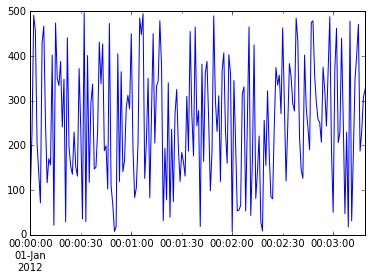

In [88]:
timestmp.plot()

In [89]:
rng2 = pd.date_range('1/1/2012', periods=1000, freq='D')
timestmp2 = pd.Series(np.random.randn(1000), index=rng2)
timestmp2.head()

2012-01-01    1.379879
2012-01-02   -0.731346
2012-01-03   -2.769822
2012-01-04   -0.340230
2012-01-05    0.682945
Freq: D, dtype: float64

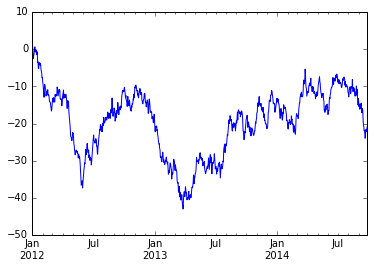

In [91]:
x = timestmp2.cumsum()
x.plot()

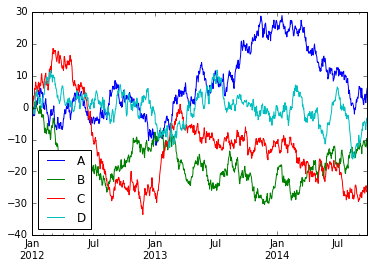

In [92]:
df8 = pd.DataFrame(np.random.randn(1000, 4), index = rng2, columns=['A', 'B', 'C', 'D'])
df8_sum = df8.cumsum()
df8_sum.plot()

Getting data in and out of pandas:

```python
pd.read_csv('name.csv')
df.to_csv('name.csv')

pd.read_excel('excelname.xlsx' 'Sheet1', index_col=None, na_values=['NA'])
df.to_excel('excelname.xlsx', sheet_name='Sheet1')

```